<a href="https://colab.research.google.com/github/minjae960/CNN_Exercise/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import random

#Image Samples Pre-processing

In [125]:
!git clone https://github.com/minjae960/CNN_Exercise.git

fatal: destination path 'CNN_Exercise' already exists and is not an empty directory.


In [126]:
DIR = '/content/CNN_Exercise/CNT Sample'
CATEGORIES = ['No', 'Sonic']

In [127]:
#save imge array, label, and file name
CNT_IMG = []

for category in CATEGORIES:
    Path = os.path.join(DIR, category)
    for file in os.listdir(Path):
        img_array = cv2.imread(os.path.join(Path, file), cv2.IMREAD_GRAYSCALE)
        CNT_IMG.append([img_array, CATEGORIES.index(category), file])

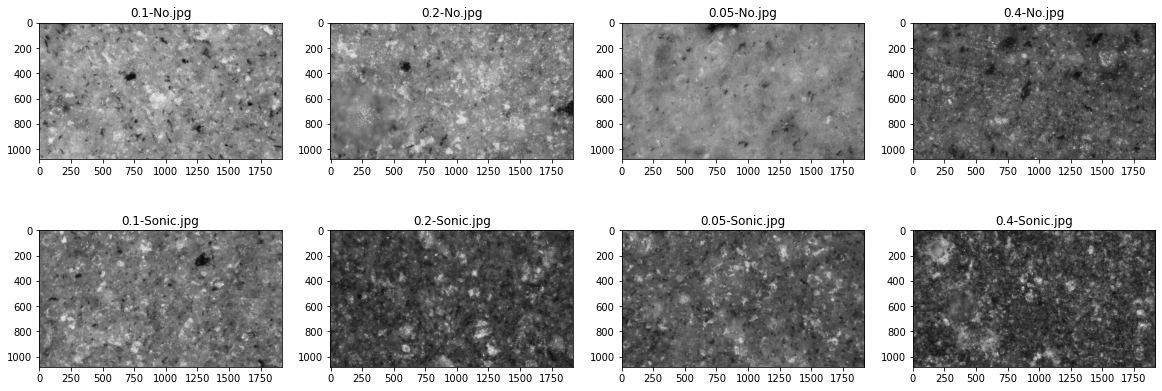

In [128]:
for i, data in enumerate(CNT_IMG):
    img_array = data[0]
    name = data[2]

    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,4,i+1)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

In [129]:
#resize image data and normalize
n_row = 4
n_col = 6
img_size = 256

SMALL_IMG = []

for img_array, label, name in CNT_IMG:
    for i in range(n_row):
        for k in range(n_col):
            height = int(img_array.shape[0]/n_row)
            width = int(img_array.shape[1]/n_col)

            small_img = img_array[i*height:(i+1)*height, k*width:(k+1)*width]

            small_img = cv2.resize(small_img, (256, 256))

            small_img = small_img / 255.0

            SMALL_IMG.append([small_img, label, name])

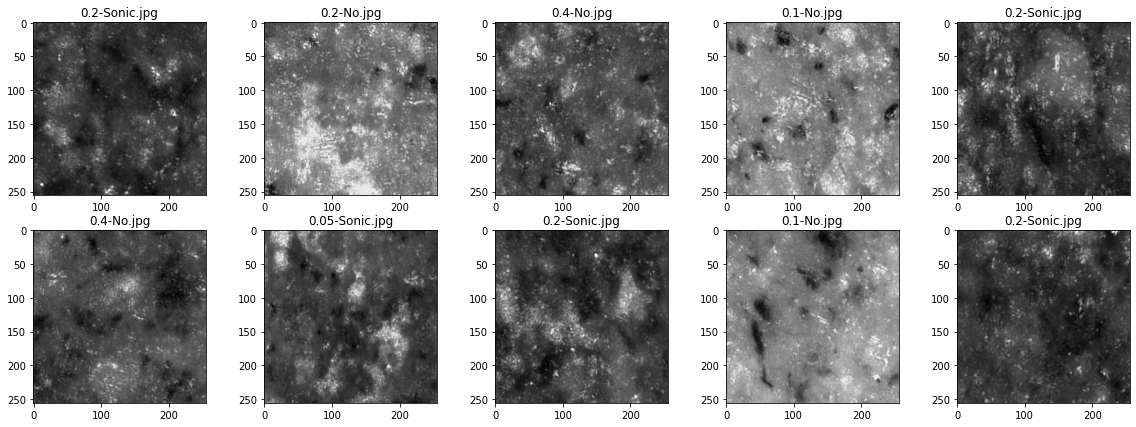

In [130]:
RANDOM_IMG = random.sample(SMALL_IMG, 10)

i=1

for img_array, label, name in RANDOM_IMG:
    

    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,5,i)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

    i+=1

In [131]:
random.shuffle(SMALL_IMG)

In [132]:
Train_Data = SMALL_IMG[:160]
Test_Data = SMALL_IMG[160:]

print(len(Train_Data), len(Test_Data))

160 32


In [133]:
x_train = []
y_train = []

for img_array, label, name in Train_Data:
    x_train.append(img_array)
    y_train.append(label)

x_train = np.array(x_train).reshape(160, img_size, img_size, 1)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(160, 256, 256, 1) (160,)


#CNN Model

In [134]:
#Build TensorFlow model -> CNN & sigmoid & binary
tf.model = tf.keras.Sequential()

#Conv1
tf.model.add(tf.keras.layers.Conv2D(filters=64, input_shape=(img_size,img_size,1), kernel_size=(3,3), 
                                    kernel_initializer='glorot_normal',activation='relu', padding='same'))
tf.model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), 
                                    kernel_initializer='glorot_normal',activation='relu', padding='same'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Conv2
tf.model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), kernel_initializer='glorot_normal', 
                                    activation='relu', padding='same'))
tf.model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), kernel_initializer='glorot_normal', 
                                    activation='relu', padding='same'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Fully Connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=1, kernel_initializer='glorot_normal', activation='sigmoid'))

tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
tf.model.summary()

#Train
tf.model.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=40)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 128, 128, 256)     295168    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 64, 64, 256)       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1048576)         

In [135]:
x_test = []
y_test = []

for img_array, label, name in Test_Data:
    x_test.append(img_array)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

print(x_test.shape, y_test.shape)

(32, 256, 256, 1) (32,)


In [136]:
Train_Accuracy = tf.model.evaluate(x_train, y_train)
Test_Accuracy = tf.model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 103ms/step - loss: 0.5840 - accuracy: 0.7188


In [137]:
Prediction = []

for pred in tf.model.predict(x_test):
    if pred > 0.5:
        Prediction.append('Sonic')
    else:
        Prediction.append('No')

[['Sonic' 'No' 'Sonic' 'Sonic' 'Sonic']
 ['Sonic' 'Sonic' 'No' 'Sonic' 'Sonic']]


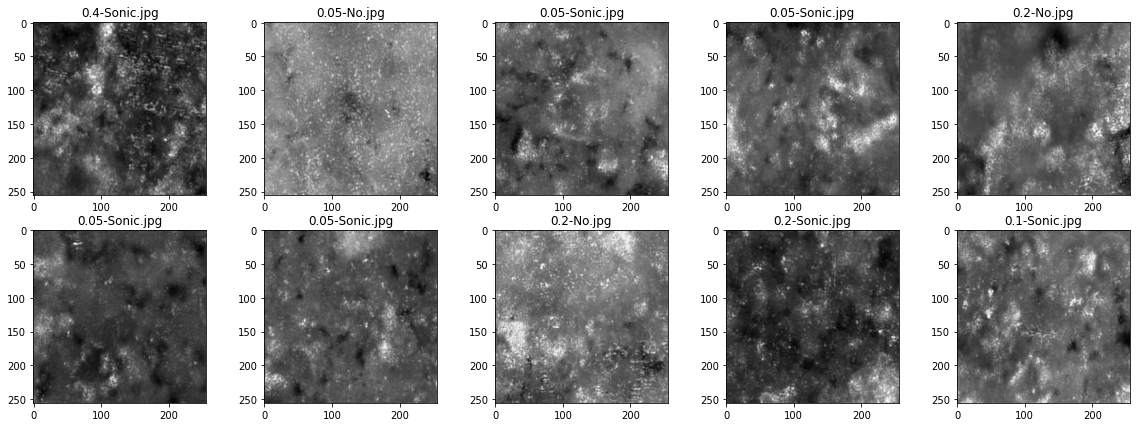

In [138]:
i = 1

for img_array, label, name in Test_Data[:10]:
    
    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,5,i)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

    i+=1

print(np.array(Prediction[:10]).reshape(2,5))